# Regex Extraction: Getting tracking times and lost trajectories

In [1]:
import rosbag
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
debug = False

In [2]:
os.getcwd()
base_path = "/home/paulo/Projects/IC_SLAM_pipelines/"
if(debug):
    bag_path = "experiment_data_debug"
else: 
    bag_path = "experiment_data"
os.chdir("{}/{}/logs".format(base_path, bag_path))
# os.chdir('/home/paulo/Projects/turtlebot_SLAM/rtabmap_dbs')

print(os.getcwd())
os.listdir(".")
# bag_names = glob.glob("bag-d*")
log_names = glob.glob("*.txt")

print(log_names)

# to copy output: maintain the cursor focus on the same cell you'll copy the output, then it'll works

/home/paulo/Projects/IC_SLAM_pipelines/experiment_data/logs
['log-esquerda-30-720-100-localization.txt', 'log-esquerda-30-320-70-localization.txt', 'log-direita-15-1080-70-localization.txt', 'log-direita-60-480-70-slam.txt', 'log-esquerda-120-1080-100-localization.txt', 'log-direita-120-320-40-localization.txt', 'log-esquerda-15-720-40-slam.txt', 'log-direita-15-1080-100-localization.txt', 'log-direita-60-1080-40-slam.txt', 'log-direita-30-720-100-localization.txt', 'log-direita-60-480-70-localization.txt', 'log-direita-60-320-40-localization.txt', 'log-direita-120-1080-70-localization.txt', 'log-esquerda-15-720-70-slam.txt', 'log-direita-120-1080-40-localization.txt', 'log-direita-15-720-40-slam.txt', 'log-direita-60-320-70-localization.txt', 'log-direita-30-720-70-slam.txt', 'log-esquerda-15-720-70-localization.txt', 'log-esquerda-120-320-70-localization.txt', 'log-esquerda-60-720-70-slam.txt', 'log-direita-120-720-70-localization.txt', 'log-esquerda-120-320-100-localization.txt', 'l

In [32]:
import re

slam_data = {}
localization_data = {}

for log in log_names:
    fh = open(log, "r").read()
    for track_time,name in zip(re.findall("mean tracking time:.......", fh), re.findall("MessagePack .*", fh)):
        # print(track_time.split()[-1])'

        signature = ((name.split()[-1]).split(".")[0]).split("/")[-1]
        params = {}
        params["side"] = signature.split("-")[1]
        params["track_time"] = float(track_time.split()[-1])
        params["fps"]  = int(signature.split("-")[2])
        params["resolution"]  = int(signature.split("-")[3])
        params["mask"]  = int(signature.split("-")[4])'
        

        if name.split()[4] =="to": 
            # If  saving "to" file: IS SLAM
            # print(((name.split()[-1]).split(".")[0]).split("/")[-1])
            slam_data[signature] = params
        else:
            # print(name.split()[4])
            localization_data[signature] = params


In [33]:
print(slam_data)
# print(slam_data)

{'map-direita-60-320-100': {'track_time': 0.0347, 'mask': 100, 'resolution': 320, 'side': 'direita', 'fps': 60}, 'map-esquerda-15-720-40': {'track_time': 0.0689, 'mask': 40, 'resolution': 720, 'side': 'esquerda', 'fps': 15}, 'map-esquerda-15-480-40': {'track_time': 0.0369, 'mask': 40, 'resolution': 480, 'side': 'esquerda', 'fps': 15}, 'map-esquerda-30-320-70': {'track_time': 0.0027, 'mask': 70, 'resolution': 320, 'side': 'esquerda', 'fps': 30}, 'map-direita-120-1080-40': {'track_time': 0.1024, 'mask': 40, 'resolution': 1080, 'side': 'direita', 'fps': 120}, 'map-esquerda-15-1080-70': {'track_time': 0.0871, 'mask': 70, 'resolution': 1080, 'side': 'esquerda', 'fps': 15}, 'map-direita-15-1080-70': {'track_time': 0.0841, 'mask': 70, 'resolution': 1080, 'side': 'direita', 'fps': 15}, 'map-direita-30-720-40': {'track_time': 0.0651, 'mask': 40, 'resolution': 720, 'side': 'direita', 'fps': 30}, 'map-direita-30-320-70': {'track_time': 0.0028, 'mask': 70, 'resolution': 320, 'side': 'direita', 'fp

## Para analisar SLAM, acho que só faz sentido olhar um dos mapas (direita ou esquerda)
desse mapa:
- Fazer um gráfico: 
    - curva redução da resolução x tracking
    - curva redução do FPS      x  tracking 
    - curva redução da informação x tracking (mask)
# Acho que foco no tempo de localização né?
# Acho que vou fazer pra ambos, apesar do localização ser mais relevante


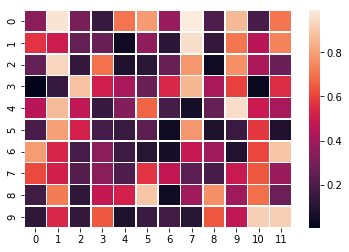

In [35]:
# # Deletando logs errados:Calcular se eu joguei fora certinho!
# # deletar as bags /filtered / mapas tbm, mas com cuidado (fazer backup)

# os.getcwd()
# base_path = "/home/paulo/Projects/IC_SLAM_pipelines/"
# if(debug):
#     bag_path = "experiment_data_debug"
# else: 
#     bag_path = "experiment_data"
# os.chdir("{}/{}/bags_filtered".format(base_path, bag_path))
# # os.chdir('/home/paulo/Projects/turtlebot_SLAM/rtabmap_dbs')

# print(os.getcwd())
# os.listdir(".")
# # bag_names = glob.glob("bag-d*")
# log_names = glob.glob("*.bag")

# print(log_names)

# for log in  log_names:
#     fps = ((log.split()[-1]).split("-")[3])
#     # print(fps)
#     try:
#        int(fps)
#     except ValueError:
#         print(fps)
#         os.remove(log)
# Não vou usar os mapas no momento

# Searching for lost tracking: Get it from logs

In [48]:
for log in log_names:
    fh = open(log, "r").read()
    lost_frames = []
    for lost in re.findall("tracking lost:.*", fh):
        lost_frames.append(lost.split(":")[-1])
    print(lost_frames)

[]
[]
[]
[' frame 1111']
[]
[' frame 3304', ' frame 4145']
[]
[]
[]
[]
[' frame 3919', ' frame 3921', ' frame 3926', ' frame 3928', ' frame 4920']
[' frame 4122']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[' frame 1777', ' frame 1779', ' frame 2610']
[]
[]
[]
[' frame 2798']
[]
[]
[' frame 690']
[]
[]
[]
[]
[]
[' frame 1125']
[]
[' frame 2875']
[]
[' frame 2642']
[]
[' frame 3550', ' frame 4634']
[]
[]
[' frame 3107', ' frame 3110', ' frame 4129']
[' frame 1158']
[]
[' frame 936']
[]
[]
[]
[' frame 2375', ' frame 2761', ' frame 2764']
[]
[]
[]
[]
[' frame 804']
[]
[' frame 2224', ' frame 2275', ' frame 2893']
[]
[]
[' frame 3567', ' frame 3583', ' frame 4679']
[]
[]
[' frame 1008']
[]
[' frame 1131']
[' frame 952']
[' frame 930']
[]
[]
[]
[]
[]
[]
[]
[' frame 2989']
[]
[]
[]
[]
[]
[]
[]
[' frame 921']
[]
[]
[]
[]
[' frame 800']
[]
[' frame 732']
[]
[]
[' frame 2824', ' frame 2828']
[]
[' frame 1058']
[]
[]
[' frame 696']
[]
[]
[]
[]
[' frame 846']
[' frame 2636']
[]
[]
[' frame 2765', ' frame 2768

## Plotting the heatmap: binary analysis of robustness
 ### If it gets lost, is not reliable

In [ ]:
# Seaborn takes care of a lot of the manual work and automatically plots a gradient at the side of the chart etc.

# import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

uniform_data = np.random.rand(10, 12)
# Organizar os dados: binario

ax = sns.heatmap(uniform_data, linewidth=0.5)
plt.show()